# Project 2


### Step 1: Load the python libraries you will need for this project 

In [37]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [38]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [39]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [40]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE scores are spread out over a larger range of data points than GPA, therefore, because of this large spread/varied distance of data points from the mean, GRE would have a larger standard deviation. 

#### Question 4. Drop data points with missing data


In [41]:
df_raw_dropped = df_raw.dropna()
df_raw_dropped.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: I can tell because now the count of data points in all the columns is equal. Prior to dropping the data, the count of data points across the three columns was not equal - implying that there were missing values in the dataframe.

#### Question 6. Create box plots for GRE and GPA

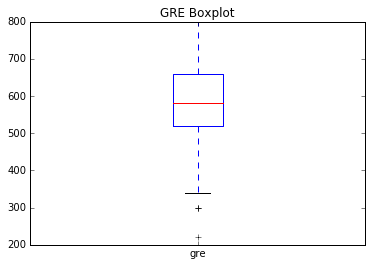

In [42]:
#boxplot 1
df_raw['gre'].plot(kind='box', title='GRE Boxplot')

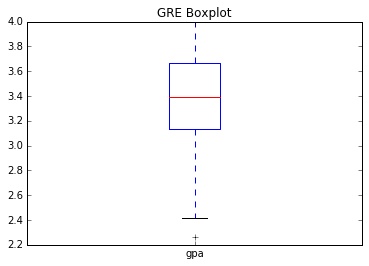

In [43]:
#boxplot 2
df_raw['gpa'].plot(kind='box', title='GRE Boxplot')

#### Question 7. What do these plots show?

These plots show the maximum, minimum, first quartile, third quartile, and median of the data being plotted. The box plot (specifically the size of the box) represents the interquartile range which is a measure of variability about the median (calculated via subtraction of the first from the third quartile).

#### Question 8. Describe each distribution 

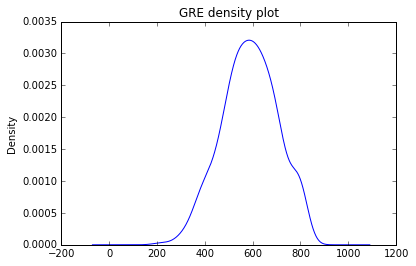

In [44]:
# plot the distribution of each variable 
df_raw['gre'].plot(kind='density', title='GRE density plot')

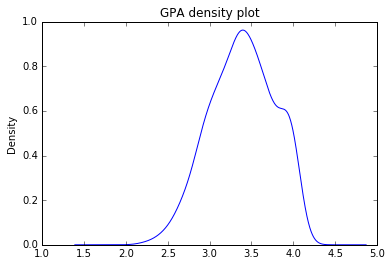

In [45]:
df_raw['gpa'].plot(kind='density', title='GPA density plot')

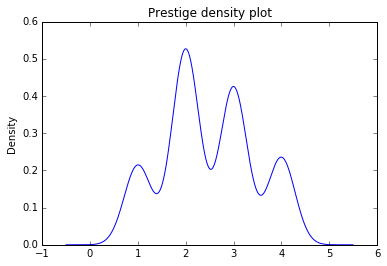

In [46]:
df_raw['prestige'].plot(kind='density', title='Prestige density plot')

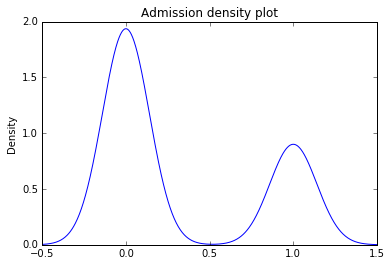

In [47]:
df_raw['admit'].plot(kind='density', title='Admission density plot')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: We may be able to satisfy the requirement of a normal distribution with a larger sample size, because as the sample size increases the effects of skew and kurtosis will not be as evident on the distribution. Though in this particular dataset, the effects are both visually and numerically relevant, therefore I cannot say that we would meet the requirement. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

In [48]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [49]:
print df_raw['gre'].skew()
print df_raw['gpa'].skew()
print df_raw['admit'].skew()
print df_raw['prestige'].skew()

-0.150126665946
-0.211765490335
0.787051304759
0.093662653554


In [50]:
print df_raw['gre'].kurt()
print df_raw['gpa'].kurt()
print df_raw['admit'].kurt()
print df_raw['prestige'].kurt()

-0.330065338167
-0.574622543215
-1.38751295838
-0.894758613394


Answer: As can be seen by the skewness and kurtosis values calculated above, the nonzero skew and kurtosis values show that the distribution is not symmetric. Specifically, with the GPA and GRE scores, it can be seen that the data shows a negative skew in the distribution, with a larger proportion of the values concentrated above the median. So the negative skew would need to be corrected. The negative kurtosis represents a larger standard deviation, and this could be corrected by reducing the variability about the mean in the dataset.

#### Question 11. Which of our variables are potentially colinear? 

In [51]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 12. What did you find?

Answer: The strongest correlation was between GRE scores and GPA values, with a correlation coefficient of roughly 0.38. This leads me to believe that out of all our variables, these two are potentially colinear.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: In order to explore the association between grad school admissions rates and prestige of undergraduate schools, I would first state my null hypothesis which is that there is no association/relationship between grad school admissions rates and prestige of undergraduate schools. I would run a linear regression and follow up by calculating the 95% confidence interval and p-values. I would then use these values to to either accept or reject the null hypothesis, given the data. 

#### Question 14. What is your hypothesis? 

Answer: My hypothesis is that there is a relationship/correlation between graduate school admissions rates and prestige of undergraduate schools.